<a href="https://colab.research.google.com/github/gomesluiz/pln-na-pratica/blob/main/01-aquisicao-dados-enriquecimento-de-dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aquisição de dados com enriquecimento de dados**

In [14]:
# Instala pacotes para análise de dados e raspagem web.
!pip install kaggle
!pip install matplotlib
!pip install pandas
!pip install requests
!pip install seaborn

In [3]:
# Declara define funções utilitárias utilizadas no notebook.
import datetime
def formata_msg(nivel, msg, componente=None):
    """
    Formata uma mensagem de log incluindo o nível de severidade, timestamp,
    componente (opcional) e a mensagem.

    Parâmetros:
    - nivel (str): Nível de severidade da mensagem (ex: 'INFO', 'ERROR', 'WARNING').
    - msg (str): A mensagem de log propriamente dita.
    - componente (str, opcional): O componente ou módulo do sistema que gera a mensagem.

    Retorna:
    - str: A mensagem de log formatada.
    """
    timestamp = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    if componente:
        return f"[{nivel}] {timestamp} - {componente}: {msg}"
    else:
        return f"[{nivel}] {timestamp} - {msg}"

In [17]:
# Importa módulos essenciais para funcionalidades do notebook.
import os

import pandas as pd
import requests
import seaborn as sns

import matplotlib.pyplot as plt

timestamp = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print(formata_msg("INFO", "Bibliotecas importadas com sucesso; ambiente pronto."))

[INFO] 2024-02-03 23:35:12 - Bibliotecas importadas com sucesso; ambiente pronto.


In [5]:
# Define o diretório local para armazenar as bases de dados públicas coletadas.
corpora_caminho = "./corpora"

# Verifica se o diretório especificado já existe no ambiente do Colab.
if not os.path.exists(corpora_caminho):
  # Caso o diretório não exista, cria um novo diretório com o nome 'corpora'.
  # Isso é útil para organizar os arquivos de dados baixados ou gerados.
  os.mkdir(corpora_caminho)

print(formata_msg("INFO", f"Diretório {corpora_caminho} foi criado com sucesso."))

[INFO] 2024-02-03 23:13:47 - Diretório ./corpora foi criado com sucesso.


## 1. Base de dados original

Buscapé é uma plataforma de comércio eletrônico brasileiro. O Buscapé funciona como um assistente de compras, para que os consumidores pesquisem produtos, preços, promoções e lojas.O Buscapé pertence à Mosaico Tecnologia ao Consumidor, que também é dona de outras plataformas de e-commerce.

In [7]:
# Define a URL da base pública armazenada no Github.
url = "https://raw.githubusercontent.com/gomesluiz/product-review-analytics/main/data/raw/buscape.csv"

# Configuração do arquivo para armazenamento da base de dados.
buscape_arquivo = "buscape-comentarios.csv"

# O método os.path.join cria o caminho completo para o arquivo, combinando
# 'corpora_caminho' com o nome do arquivo.
buscape_caminho = os.path.join(corpora_caminho, buscape_arquivo)

# Define o formato do arquivo. Necessário para arquivos textos
# armazenados no raw.githubusercontent.com.
parametros = {"downloadformat": "csv"}

# Executa o download do arquivo especificado na URL com os parâmetros
# especificados
resposta = requests.get(url, params=parametros)
if resposta.status_code == 200:
  # Se o status for igual a 200 (sucesso), grava o arquivo no caminho
  # especificado
  with open(buscape_caminho, "wb") as f:
    f.write(resposta.content)
  print(f"Download do {buscape_arquivo} concluído com sucesso!")
else:
   print(f"Falha no download do arquivo {buscape_arquivo}:", resposta.status_code)


Download do buscape-comentarios.csv concluído com sucesso!


In [9]:
# O comando head do linux mostra as cinco primeiras linhas do arquivo gravado.
!head -n 5 {buscape_caminho}

original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
4_55516,"Estou muito satisfeito, o visor é melhor do que eu imaginava, boas imagens, desing ultra fino. Pelo preço é um exelente aparelho.

O que gostei: Desing exelente, display, custo beneficio.



In [12]:
buscape_df = pd.read_csv(buscape_caminho)
num_rows = buscape_df.shape[0]
num_cols = buscape_df.shape[1]
print(formata_msg("INFO", f"The dataset has {num_rows} rows and {num_cols} columns."))

[INFO] 2024-02-03 23:30:36 - The dataset has 84991 rows and 8 columns.


In [13]:
buscape_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84991 entries, 0 to 84990
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   original_index         84991 non-null  object 
 1   review_text            84990 non-null  object 
 2   review_text_processed  84990 non-null  object 
 3   review_text_tokenized  84991 non-null  object 
 4   polarity               73627 non-null  float64
 5   rating                 84991 non-null  int64  
 6   kfold_polarity         84991 non-null  int64  
 7   kfold_rating           84991 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 5.2+ MB


<Axes: >

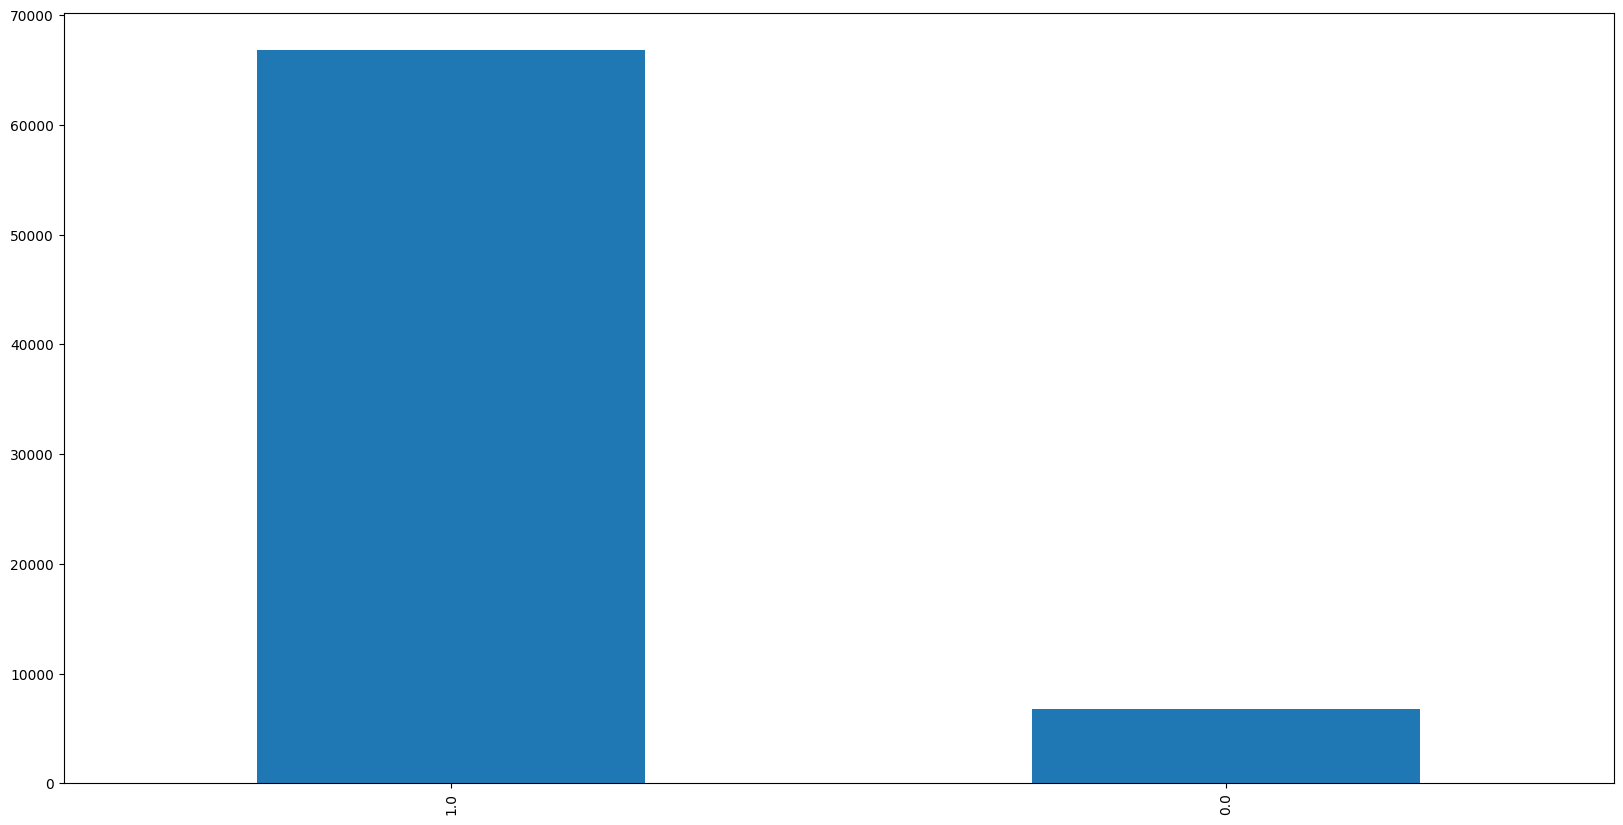

In [18]:
plt.figure(figsize=(20, 10))
polarity_counts = buscape_df['polarity'].value_counts()
polarity_counts.plot(kind="bar")